In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Adım1: flo_data_20K.csv verisini okuyunuz.Dataframe’in kopyasını oluşturunuz.
df = pd.read_csv(r"C:\Users\yenib\OneDrive\Masaüstü\flo_data_20k.csv")
df = df.copy()

In [6]:
'''
İş Problemi (Business Problem)
Online ayakkabı mağazası olan FLO müşterilerini segmentlere ayırıp
bu segmentlere göre pazarlama stratejileri belirlemek istiyor.Buna yönelik olarak
müşterilerin davranışları tanımlanacak ve bu davranışlardaki öbeklenmelere göre gruplar
oluşturulacak.
'''

'\nİş Problemi (Business Problem)\nOnline ayakkabı mağazası olan FLO müşterilerini segmentlere ayırıp\nbu segmentlere göre pazarlama stratejileri belirlemek istiyor.Buna yönelik olarak\nmüşterilerin davranışları tanımlanacak ve bu davranışlardaki öbeklenmelere göre gruplar\noluşturulacak.\n'

In [7]:
'''
Veri Seti Hikayesi
Veri seti Flo’dan son alışverişlerini 2020 -2021 yıllarında OmniChannel(hem online hem offline alışveriş yapan)
olarak yapan müşterilerin geçmiş alışveriş davranışlarından elde edilen bilgilerden 
oluşmaktadır.

12 Değişken
19.945 Gözlem
2.7MB
master_id : Eşsiz müşteri numarası 
order_channel : Alışveriş yapılan platforma ait hangi kanalın kullanıldığı(Android, ios, Desktop, Mobile)
last_order_channel : En son alışverişin yapıldığı kanal 
first_order_date : Müşterinin yaptığıilk alışveriş tarihi 
last_order_date : Müşterinin yaptığı son alışveriş tarihi 
last_order_date_online : Müşterinin online platformda yaptığı son alışveriş tarihi 
last_order_date_offline : Müşterinin offline platformda yaptığı son alışveriş tarihi
order_num_total_ever_online : Müşterinin online platformda yaptığı toplam alışveriş sayısı
order_num_total_ever_offline : Müşterinin offline'da yaptığı toplam alışveriş sayısı 
customer_value_total_ever_offline : Müşterinin offline alışverişlerinde ödediğitoplam ücret
customer_value_total_ever_online : Müşterinin online alışverişlerinde ödediği toplam ücret 
interested_in_categories_12 : Müşterinin son 12 ayda alışveriş yaptığı kategorilerin listesi
'''

"\nVeri Seti Hikayesi\nVeri seti Flo’dan son alışverişlerini 2020 -2021 yıllarında OmniChannel(hem online hem offline alışveriş yapan)\nolarak yapan müşterilerin geçmiş alışveriş davranışlarından elde edilen bilgilerden \noluşmaktadır.\n\n12 Değişken\n19.945 Gözlem\n2.7MB\nmaster_id : Eşsiz müşteri numarası \norder_channel : Alışveriş yapılan platforma ait hangi kanalın kullanıldığı(Android, ios, Desktop, Mobile)\nlast_order_channel : En son alışverişin yapıldığı kanal \nfirst_order_date : Müşterinin yaptığıilk alışveriş tarihi \nlast_order_date : Müşterinin yaptığı son alışveriş tarihi \nlast_order_date_online : Müşterinin online platformda yaptığı son alışveriş tarihi \nlast_order_date_offline : Müşterinin offline platformda yaptığı son alışveriş tarihi\norder_num_total_ever_online : Müşterinin online platformda yaptığı toplam alışveriş sayısı\norder_num_total_ever_offline : Müşterinin offline'da yaptığı toplam alışveriş sayısı \ncustomer_value_total_ever_offline : Müşterinin offline

In [8]:
 # İlk 10 gözlem
df.head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]
5,e585280e-aae1-11e9-a2fc-000d3a38a36f,Desktop,Offline,2018-11-18,2021-03-13,2018-11-18,2021-03-13,1.0,2.0,150.87,49.99,[KADIN]
6,c445e4ee-6242-11ea-9d1a-000d3a38a36f,Android App,Android App,2020-03-04,2020-10-18,2020-10-18,2020-03-04,3.0,1.0,59.99,315.94,[AKTIFSPOR]
7,3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f,Mobile,Offline,2020-05-15,2020-08-12,2020-05-15,2020-08-12,1.0,1.0,49.99,113.64,[COCUK]
8,cfbda69e-5b4f-11ea-aca7-000d3a38a36f,Android App,Android App,2020-01-23,2021-03-07,2021-03-07,2020-01-25,3.0,2.0,120.48,934.21,"[ERKEK, COCUK, KADIN]"
9,1143f032-440d-11ea-8b43-000d3a38a36f,Mobile,Mobile,2019-07-30,2020-10-04,2020-10-04,2019-07-30,1.0,1.0,69.98,95.98,"[KADIN, AKTIFSPOR]"


In [14]:
# Değişken isimleri
df.columns

Index(['master_id', 'order_channel', 'last_order_channel', 'first_order_date',
       'last_order_date', 'last_order_date_online', 'last_order_date_offline',
       'order_num_total_ever_online', 'order_num_total_ever_offline',
       'customer_value_total_ever_offline', 'customer_value_total_ever_online',
       'interested_in_categories_12'],
      dtype='object')

In [81]:
# Betimsel istatistik
df.describe().T

,count,mean,min,25%,50%,75%,max,std
first_order_date,19945,2019-03-22 16:43:55.246929152,2013-01-14 00:00:00,2019-02-16 00:00:00,2019-08-20 00:00:00,2020-01-01 00:00:00,2021-05-27 00:00:00,NaN
last_order_date,19945,2021-01-17 12:59:57.653547264,2020-05-30 00:00:00,2020-11-11 00:00:00,2021-02-10 00:00:00,2021-04-19 00:00:00,2021-05-30 00:00:00,NaN
last_order_date_online,19945,2020-08-10 01:08:52.644773376,2014-02-24 00:00:00,2020-06-18 00:00:00,2020-12-14 00:00:00,2021-04-05 00:00:00,2021-05-30 00:00:00,NaN
last_order_date_offline,19945,2020-05-17 12:07:24.021058048,2019-01-22 00:00:00,2019-11-04 00:00:00,2020-06-22 00:00:00,2020-12-25 00:00:00,2021-05-28 00:00:00,NaN
order_num_total_ever_online,19945.0,3.110855,1.0,1.0,2.0,4.0,200.0,4.225647
order_num_total_ever_offline,19945.0,1.913913,1.0,1.0,1.0,2.0,109.0,2.06288
customer_value_total_ever_offline,19945.0,253.922597,10.0,99.99,179.98,319.97,18119.14,301.532853
customer_value_total_ever_online,19945.0,497.32169,12.99,149.98,286.46,578.44,45220.13,832.601886
total_orders,19945.0,5.024768,2.0,3.0,4.0,6.0,202.0,4.742707
total_value,19945.0,751.244287,44.98,339.98,545.27,897.78,45905.1,895.402173


In [16]:
# Boş değer
df.isnull().sum()
# df.isna().sum()

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

In [17]:
# Değişken tipleri
df.dtypes

master_id                             object
order_channel                         object
last_order_channel                    object
first_order_date                      object
last_order_date                       object
last_order_date_online                object
last_order_date_offline               object
order_num_total_ever_online          float64
order_num_total_ever_offline         float64
customer_value_total_ever_offline    float64
customer_value_total_ever_online     float64
interested_in_categories_12           object
dtype: object

In [83]:
# Adım 3:Omnichannel müşterilerin hem online'dan hemde offline platformlardan alışveriş
#yaptığını ifade etmektedir. Her bir müşterinin toplam alışveriş sayısı ve harcaması için yeni değişkenler oluşturunuz.

grouped = df.groupby("master_id")[["order_num_total_ever_online", "order_num_total_ever_offline"]].count()
grouped

,order_num_total_ever_online,order_num_total_ever_offline
master_id,,
00016786-2f5a-11ea-bb80-000d3a38a36f,1,1
00034aaa-a838-11e9-a2fc-000d3a38a36f,1,1
000be838-85df-11ea-a90b-000d3a38a36f,1,1
000c1fe2-a8b7-11ea-8479-000d3a38a36f,1,1
000f5e3e-9dde-11ea-80cd-000d3a38a36f,1,1
...,...,...
fff1db94-afd9-11ea-b736-000d3a38a36f,1,1
fff4736a-60a4-11ea-8dd8-000d3a38a36f,1,1
fffacd34-ae14-11e9-a2fc-000d3a38a36f,1,1


In [20]:
df['total_orders'] = df.groupby('master_id')[['order_num_total_ever_online', 'order_num_total_ever_offline']].transform('sum').sum(axis=1)

In [21]:
df.head(5)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_orders
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],5.0
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",5.0
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.0
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],2.0


In [22]:
df["total_value"] = df.groupby("master_id")[["customer_value_total_ever_offline", "customer_value_total_ever_online"]].transform('sum').sum(axis=1)

In [26]:
df.head(5)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_orders,total_value
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],5.0,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",5.0,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.0,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],2.0,209.98


In [27]:
# Adım 4: Değişken tiplerini inceleyiniz. Tarih ifade eden değişkenlerin tipini date'e çeviriniz.
df.dtypes
# first_order_date,last_order_date,last_order_date_online,last_order_date_offline    

master_id                             object
order_channel                         object
last_order_channel                    object
first_order_date                      object
last_order_date                       object
last_order_date_online                object
last_order_date_offline               object
order_num_total_ever_online          float64
order_num_total_ever_offline         float64
customer_value_total_ever_offline    float64
customer_value_total_ever_online     float64
interested_in_categories_12           object
total_orders                         float64
total_value                          float64
dtype: object

In [29]:
df["first_order_date"] = pd.to_datetime(df["first_order_date"])
df["last_order_date"] = pd.to_datetime(df["last_order_date"])
df["last_order_date_online"] = pd.to_datetime(df["last_order_date_online"])
df["last_order_date_offline"] = pd.to_datetime(df["last_order_date_offline"])

In [30]:
df.dtypes

master_id                                    object
order_channel                                object
last_order_channel                           object
first_order_date                     datetime64[ns]
last_order_date                      datetime64[ns]
last_order_date_online               datetime64[ns]
last_order_date_offline              datetime64[ns]
order_num_total_ever_online                 float64
order_num_total_ever_offline                float64
customer_value_total_ever_offline           float64
customer_value_total_ever_online            float64
interested_in_categories_12                  object
total_orders                                float64
total_value                                 float64
dtype: object

In [32]:
# Adım 5: Alışveriş kanallarındaki müşteri sayısının, toplam alınan ürün sayısının ve toplam harcamaların dağılımına bakınız.

# 'order_channel' göre gruplandırma ve istenen metriklerin hesaplanması
channel_summary = df.groupby('order_channel').agg(
    num_customers=('master_id', 'nunique'),  # Eşsiz müşteri sayısı
    total_products=('total_orders', 'sum'),  # Toplam ürün sayısı
    total_spending=('total_value', 'sum')  # Toplam harcama
).reset_index()

# Özet veriyi görüntüleme
print(channel_summary)



  order_channel  num_customers  total_products  total_spending
0   Android App           9495         52269.0      7819062.76
1       Desktop           2735         10920.0      1610321.46
2       Ios App           2833         15351.0      2525999.93
3        Mobile           4882         21679.0      3028183.16


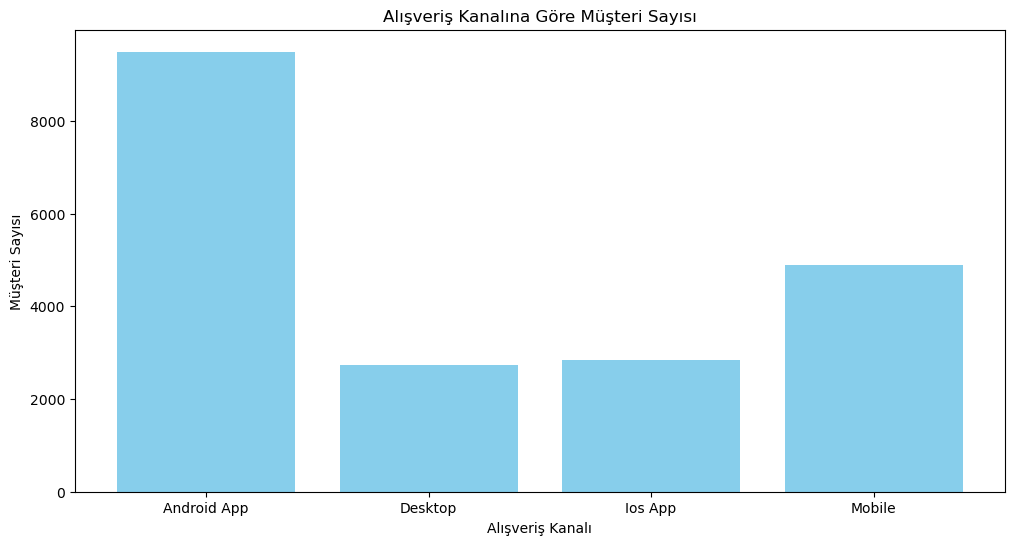

In [33]:
plt.figure(figsize=(12, 6))
plt.bar(channel_summary['order_channel'], channel_summary['num_customers'], color='skyblue')
plt.title('Alışveriş Kanalına Göre Müşteri Sayısı')
plt.xlabel('Alışveriş Kanalı')
plt.ylabel('Müşteri Sayısı')
plt.show()


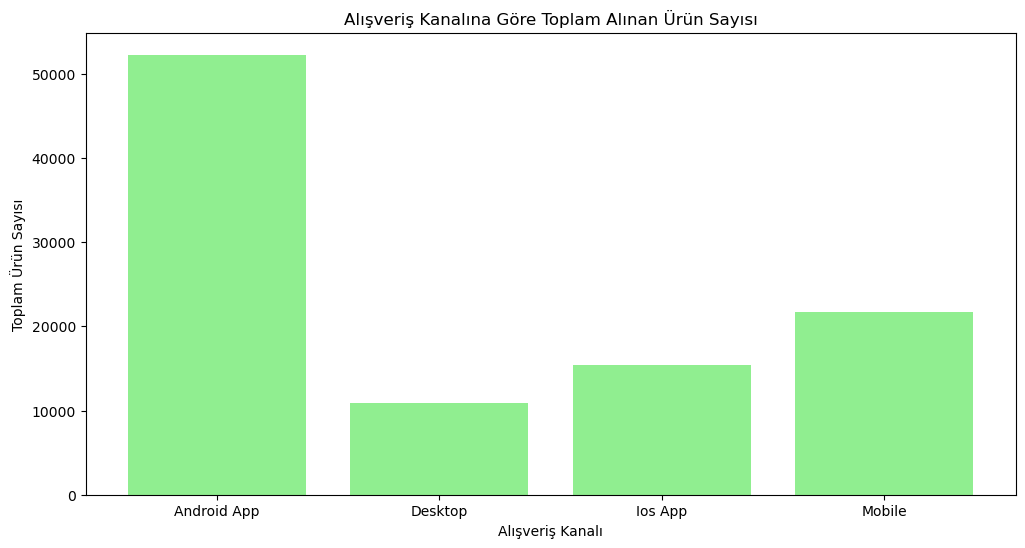

In [34]:
plt.figure(figsize=(12, 6))
plt.bar(channel_summary['order_channel'], channel_summary['total_products'], color='lightgreen')
plt.title('Alışveriş Kanalına Göre Toplam Alınan Ürün Sayısı')
plt.xlabel('Alışveriş Kanalı')
plt.ylabel('Toplam Ürün Sayısı')
plt.show()


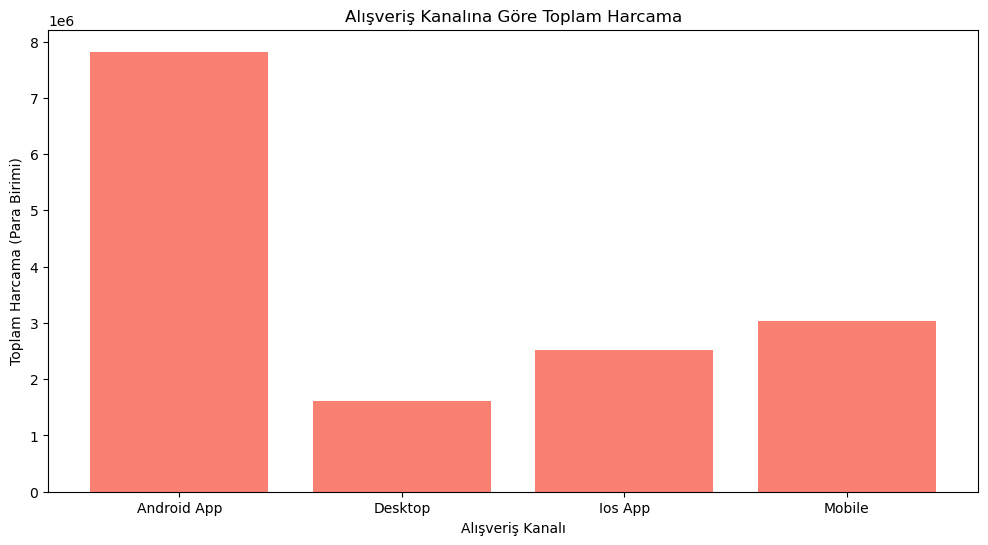

In [36]:
plt.figure(figsize=(12, 6))
plt.bar(channel_summary['order_channel'], channel_summary['total_spending'], color='salmon')
plt.title('Alışveriş Kanalına Göre Toplam Harcama')
plt.xlabel('Alışveriş Kanalı')
plt.ylabel('Toplam Harcama (Para Birimi)')
plt.show()


In [37]:
# Adım 6:  En fazla kazancı getiren ilk 10 müşteriyi sıralayınız.
# Toplam harcamaya göre müşterileri sıralama ve ilk 10 müşteriyi seçme
top_10_customers = df.groupby('master_id').agg(
    total_spending=('total_value', 'sum')
).sort_values(by='total_spending', ascending=False).head(10).reset_index()

# İlk 10 müşteriyi görüntüleme
print(top_10_customers)

                              master_id  total_spending
0  5d1c466a-9cfd-11e9-9897-000d3a38a36f        45905.10
1  d5ef8058-a5c6-11e9-a2fc-000d3a38a36f        36818.29
2  73fd19aa-9e37-11e9-9897-000d3a38a36f        33918.10
3  7137a5c0-7aad-11ea-8f20-000d3a38a36f        31227.41
4  47a642fe-975b-11eb-8c2a-000d3a38a36f        20706.34
5  a4d534a2-5b1b-11eb-8dbd-000d3a38a36f        18443.57
6  d696c654-2633-11ea-8e1c-000d3a38a36f        16918.57
7  fef57ffa-aae6-11e9-a2fc-000d3a38a36f        12726.10
8  cba59206-9dd1-11e9-9897-000d3a38a36f        12282.24
9  fc0ce7a4-9d87-11e9-9897-000d3a38a36f        12103.15


In [38]:
# Adım 7: En fazla siparişi veren ilk 10 müşteriyi sıralayınız
top_10_customers_order = df.groupby('master_id').agg(
    total_orders_number = ('total_orders','sum')
).sort_values(by = 'total_orders_number', ascending = False).head(10).reset_index()

print(top_10_customers_order)

                              master_id  total_orders_number
0  5d1c466a-9cfd-11e9-9897-000d3a38a36f                202.0
1  cba59206-9dd1-11e9-9897-000d3a38a36f                131.0
2  a57f4302-b1a8-11e9-89fa-000d3a38a36f                111.0
3  fdbe8304-a7ab-11e9-a2fc-000d3a38a36f                 88.0
4  329968c6-a0e2-11e9-a2fc-000d3a38a36f                 83.0
5  73fd19aa-9e37-11e9-9897-000d3a38a36f                 82.0
6  44d032ee-a0d4-11e9-a2fc-000d3a38a36f                 77.0
7  b27e241a-a901-11e9-a2fc-000d3a38a36f                 75.0
8  d696c654-2633-11ea-8e1c-000d3a38a36f                 70.0
9  a4d534a2-5b1b-11eb-8dbd-000d3a38a36f                 70.0


In [39]:
df.columns

Index(['master_id', 'order_channel', 'last_order_channel', 'first_order_date',
       'last_order_date', 'last_order_date_online', 'last_order_date_offline',
       'order_num_total_ever_online', 'order_num_total_ever_offline',
       'customer_value_total_ever_offline', 'customer_value_total_ever_online',
       'interested_in_categories_12', 'total_orders', 'total_value'],
      dtype='object')

In [85]:
# Veri ön hazırlık sürecini fonksiyonlaştırınız.
def data_prep(dataframe):
    dataframe["order_num_total"] = dataframe["order_num_total_ever_online"] + dataframe["order_num_total_ever_offline"]
    dataframe["customer_value_total"] = dataframe["customer_value_total_ever_offline"] + dataframe["customer_value_total_ever_online"]
    date_columns = dataframe.columns[dataframe.columns.str.contains("date")]
    dataframe[date_columns] = dataframe[date_columns].apply(pd.to_datetime)
    return dataframe

In [41]:
# Görev 2:  RFM Metriklerinin Hesaplanması
# Adım 1: Recency, Frequency ve Monetary tanımlarını yapınız

In [50]:
df["last_order_date"].max()

Timestamp('2021-05-30 00:00:00')

In [58]:
from datetime import datetime

# Doğru bir şekilde tarih oluşturma
today_date = datetime(2021, 5, 31)
print(today_date)


2021-05-31 00:00:00


In [59]:
df.head(1)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_orders,total_value
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],5.0,939.37


In [60]:
rfm = df.groupby('master_id').agg({'last_order_date': lambda date: (today_date - date.max()).days,
                                  'total_orders': lambda num: num.nunique(),
                                  'total_value': lambda total_value: total_value.sum()})

In [61]:
rfm.head(2)

,last_order_date,total_orders,total_value
master_id,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,9,1,776.07
00034aaa-a838-11e9-a2fc-000d3a38a36f,297,1,269.47


In [62]:
rfm.columns = ['recency', 'frequency', 'monetary']

In [63]:
rfm.head()

,recency,frequency,monetary
master_id,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,9,1,776.07
00034aaa-a838-11e9-a2fc-000d3a38a36f,297,1,269.47
000be838-85df-11ea-a90b-000d3a38a36f,212,1,722.69
000c1fe2-a8b7-11ea-8479-000d3a38a36f,26,1,874.16
000f5e3e-9dde-11ea-80cd-000d3a38a36f,19,1,1620.33


In [64]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,19945.0,133.458360,103.281149,1.00,42.00,110.00,201.00,366.0
frequency,19945.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.0
monetary,19945.0,751.244287,895.402173,44.98,339.98,545.27,897.78,45905.1


In [66]:
rfm.shape

(19945, 3)

In [68]:
# Görev 3: RF Skorunun Hesaplanması
# Adım 1: Recency, Frequency ve Monetary metriklerini qcut yardımı ile 1-5 arasında skorlara çeviriniz. 
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels = [5, 4, 3, 2, 1])
rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method = "first"), 5, labels = [1, 2, 3, 4, 5])
rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels = [1, 2, 3, 4, 5])

In [69]:
# Adım 2: Bu skorları recency_score, frequency_score ve monetary_score olarak kaydediniz.
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score
master_id,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,9,1,776.07,5,1,4
00034aaa-a838-11e9-a2fc-000d3a38a36f,297,1,269.47,1,1,1
000be838-85df-11ea-a90b-000d3a38a36f,212,1,722.69,2,1,4
000c1fe2-a8b7-11ea-8479-000d3a38a36f,26,1,874.16,5,1,4
000f5e3e-9dde-11ea-80cd-000d3a38a36f,19,1,1620.33,5,1,5


In [70]:
# Adım 3: recency_score ve frequency_score’u tek bir değişken olarak ifade ediniz ve RF_SCORE olarak kaydediniz. 
rfm["RF_SCORE"] = (rfm['recency_score'].astype(str) +
                  rfm['frequency_score'].astype(str))

In [71]:
rfm.head(2)

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE
master_id,,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,9,1,776.07,5,1,4,51
00034aaa-a838-11e9-a2fc-000d3a38a36f,297,1,269.47,1,1,1,11


In [72]:
# Görev 4:  RF Skorunun Segment Olarak Tanımlanması 
# Adım 1: Oluşturulan RF skorları için segment tanımlamaları yapınız.
# Adım 2: Aşağıdaki seg_map yardımı ile skorları segmentlere çeviriniz.

#RFM isimlendirmesi
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'[3][1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41':'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [73]:
rfm['segment'] = rfm['RF_SCORE'].replace(seg_map, regex = True)

In [74]:
# Görev 5:  Aksiyon Zamanı !
# Adım1:  Segmentlerin recency, frequnecy ve monetary ortalamalarını inceleyiniz.
rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(["mean", "count"])

recency       frequency          monetary      
                           mean count      mean count        mean count
segment                                                                
about_to_sleep       112.396994  1597       1.0  1597  696.260914  1597
at_Risk              242.290425  3154       1.0  3154  652.210117  3154
cant_loose           242.276373  1621       1.0  1621  663.802424  1621
champions             16.442284  1594       1.0  1594  921.381092  1594
hibernating          242.963608  3160       1.0  3160  626.845114  3160
loyal_customers       85.464612  3179       1.0  3179  784.635225  3179
need_attention       111.617949   780       1.0   780  716.807667   780
new_customers         16.389549   842       1.0   842  917.125534   842
potential_loyalists   35.558054  3247       1.0  3247  880.911783  3247
promising             56.329442   771       1.0   771  782.135603   771